# Compare NIST energy levels data

In [1]:
# Uncomment the next line if you have ipympl installed and want interactive plots
# %matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

from rydstate.species import Strontium88

In [2]:
species = Strontium88()
s_tot = 0  # singlet

nus_with_nist = []
nus_without_nist = []
labels = []
n_list = []

l_int2str = {0: "s", 1: "p", 2: "d", 3: "f", 4: "g", 5: "h", 6: "i", 7: "j"}
for n in range(5, 25):
    for l in range(n):
        if not species.is_allowed_shell(n, l, s_tot):
            continue
        for _j_tot in np.arange(abs(l - s_tot), l + s_tot + 1):
            j_tot = float(_j_tot)
            if (n, l, j_tot, s_tot) not in species._nist_energy_levels:  # noqa: SLF001
                continue

            labels.append(f"{n}{l_int2str.get(l, ',' + str(l))}_{j_tot:.1f}")
            nus_with_nist.append(species.calc_nu(n, l, j_tot, s_tot, use_nist_data=True, nist_n_max=60))
            nus_without_nist.append(species.calc_nu(n, l, j_tot, s_tot, use_nist_data=False))
            n_list.append(n)

nus_with_nist = np.array(nus_with_nist)
nus_without_nist = np.array(nus_without_nist)

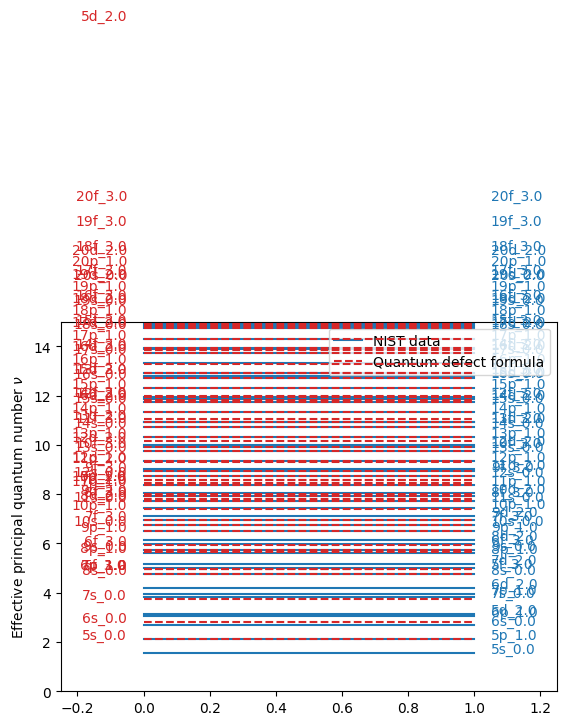

In [3]:
fig, ax = plt.subplots()

for i, label in enumerate(labels):
    ax.plot([0, 1], [nus_with_nist[i]] * 2, "C0", zorder=-10)
    ax.plot([0, 1], [nus_without_nist[i]] * 2, "C3--", zorder=10)
    ax.text(1.05, nus_with_nist[i], label, color="C0")
    ax.text(-0.05, nus_without_nist[i], label, color="C3", ha="right")

ax.plot([], [] * 2, "C0", label="NIST data")
ax.plot([], [] * 2, "C3--", label="Quantum defect formula")
ax.legend(loc="upper right")

ax.set_ylabel(r"Effective principal quantum number $\nu$")
ax.set_xlim(-0.25, 1.25)
ax.set_ylim(0, 15)

plt.show()

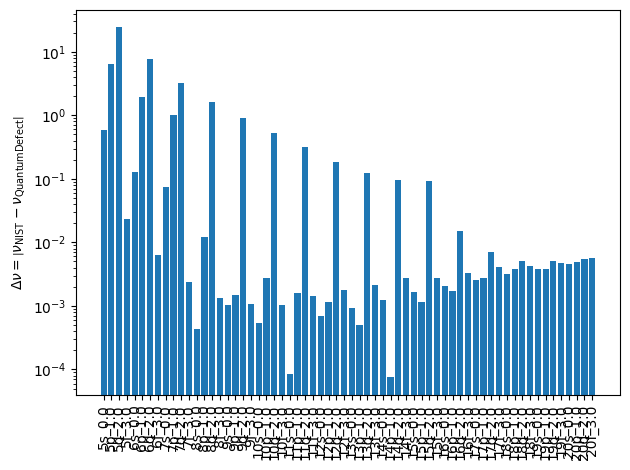

In [4]:
fig, ax = plt.subplots()

nus_diff = np.abs(np.array(nus_with_nist) - np.array(nus_without_nist))
ax.bar(np.arange(len(nus_diff)), nus_diff, tick_label=labels, color="C0")

ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel(r"$\Delta \nu = \left|\nu_{\text{NIST}} - \nu_{\text{QuantumDefect}}\right|$")
ax.set_yscale("log")

fig.tight_layout()
plt.show()